In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [80]:
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print("X_train original shape", X_train.shape)
    print("y_train original shape", y_train.shape)
    print("X_test original shape", X_test.shape)
    print("y_test original shape", y_test.shape)
    return X_train, y_train, X_test, y_test

In [81]:
def show(i, X_train, y_train):
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Class '+ str(y_train[i]))

In [82]:
#(batches, height, widhth, channel)
def reshape(X_train, X_test):
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    return X_train, X_test

In [83]:
#Here we’ve rescaled the image data so that each pixel lies in the interval [0, 1] instead of [0, 255]. It is always a good idea to normalize the input so that each dimension has approximately the same scale.
def rescale(X_train, X_test):
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train/=255
    X_test/=255
    print('New shape of X_train is: ', X_train.shape)
    return X_train, X_test

In [84]:
def one_hot_encoding(i, y_train, y_test):
    number_of_classes = 10
    Y_train = np_utils.to_categorical(y_train, number_of_classes)
    Y_test = np_utils.to_categorical(y_test, number_of_classes)
    print('Before one hot encoding: ', y_train[i])
    print('After one hot encoding: ', Y_train[i])
    return Y_train, Y_test

In [85]:
def CNN_model(X_train, X_test, Y_train, Y_test, e):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
    model.add(Activation('relu'))
    BatchNormalization(axis=-1)
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    BatchNormalization(axis=-1)
    model.add(Conv2D(64,(3, 3)))
    model.add(Activation('relu'))
    BatchNormalization(axis=-1)
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    # Fully connected layer

    BatchNormalization()
    model.add(Dense(512))
    model.add(Activation('relu'))
    BatchNormalization()
    model.add(Dropout(0.2))
    model.add(Dense(10))

    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    #to reduce overfitting : data augmentation
    gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

    test_gen = ImageDataGenerator()
    train_generator = gen.flow(X_train, Y_train, batch_size=64)
    test_generator = test_gen.flow(X_test, Y_test, batch_size=64)
    model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=e, 
                    validation_data=test_generator, validation_steps=10000//64)
    return model

In [86]:
def accuracy(X_test, Y_test, model):
    score = model.evaluate(X_test, Y_test)
    print()
    print('Test accuracy: ', score[1] * 100)

In [89]:
def main():
    X_train, y_train, X_test, y_test = load_data()
    i = 1
    show(i, X_train, y_train)
    X_train, X_test = reshape(X_train, X_test)
    X_train, X_test = rescale(X_train, X_test)
    Y_train, Y_test = one_hot_encoding(i, y_train, y_test)
    # epochs = 3
    e = 2
    model = CNN_model(X_train, X_test, Y_train, Y_test, e)
    accuracy(X_test, Y_test, model)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
New shape of X_train is:  (60000, 28, 28, 1)
Before one hot encoding:  0
After one hot encoding:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/2
937/937 [==============================] - 328s 350ms/step - loss: 0.2055 - acc: 0.9346 - val_loss: 0.0363 - val_acc: 0.9881
Epoch 2/2
10000/10000 [==============================] - 16s 2ms/step

Test accuracy:  99.27


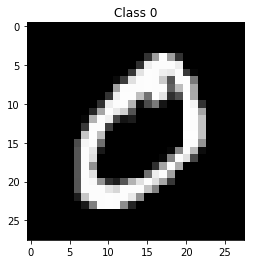

In [90]:
main()

Epoch 1/4
937/937 [==============================] - 310s 331ms/step - loss: 0.2078 - acc: 0.9346 - val_loss: 0.0298 - val_acc: 0.9910
Epoch 2/4
937/937 [==============================] - 304s 325ms/step - loss: 0.0654 - acc: 0.9795 - val_loss: 0.0310 - val_acc: 0.9896
Epoch 3/4
937/937 [==============================] - 301s 321ms/step - loss: 0.0481 - acc: 0.9859 - val_loss: 0.0202 - val_acc: 0.9923
Epoch 4/4
937/937 [==============================] - 302s 323ms/step - loss: 0.0428 - acc: 0.9872 - val_loss: 0.0218 - val_acc: 0.9932


10000/10000 [==============================] - 16s 2ms/step

Test accuracy:  99.32
